# Ensembling Model (Majority Voting)

In [27]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import random

In [23]:
prediction_files = ['test_output/BiLSTM.csv','test_output/BERT_prediction_results.csv','test_output/CNN_MLP.csv','test_output/GRU_result_v2.csv']
all_predictions = []
for file_path in prediction_files:
    preds = pd.read_csv(file_path, header=None).squeeze().values 
    print(preds.shape)
    if preds.ndim == 2 and preds.shape[1] == 2:
        # 2D array (Model 1): ID + label
        preds = preds[1:, 1]  # skip header row, take second column
    else:
        # 1D array (Models 2-4)
        preds = preds[1:] # Skip first element (header) and select first column

    all_predictions.append(preds)# (n_samples,)
    

(3628, 2)
(3628,)
(3628,)
(3628,)


In [24]:
df = pd.read_csv('test_df.csv')
answer = df['playlist_genre']

In [25]:
n_samples = len(all_predictions[0])
assert all(len(preds) == n_samples for preds in all_predictions), "Mismatch in number of predictions!"

In [28]:
ensemble_predictions = []

for i in range(n_samples):
    votes = [model_preds[i] for model_preds in all_predictions]
    counter = Counter(votes)
    top_votes = counter.most_common()
    max_count = top_votes[0][1]
    candidates = [label for label, count in top_votes if count == max_count]
    majority_vote = random.choice(candidates)  # Randomly pick among tied classes
    ensemble_predictions.append(majority_vote)

ensemble_predictions = np.array(ensemble_predictions)

In [30]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import nltk
import re
from tqdm import tqdm

print("\n🎯 Classification Report:")
print(classification_report(answer, ensemble_predictions))


🎯 Classification Report:
              precision    recall  f1-score   support

         edm       0.57      0.50      0.53       383
       latin       0.76      0.58      0.66       421
         pop       0.56      0.54      0.55       819
         r&b       0.65      0.65      0.65       657
         rap       0.79      0.72      0.75       687
        rock       0.65      0.89      0.75       660

    accuracy                           0.66      3627
   macro avg       0.66      0.65      0.65      3627
weighted avg       0.66      0.66      0.65      3627



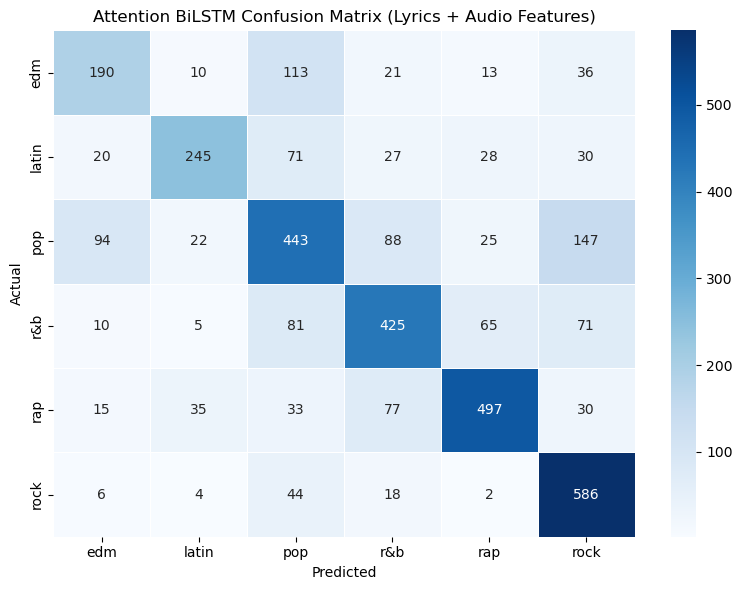

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute confusion matrix
cm = confusion_matrix(answer, ensemble_predictions)
label_encode = ['edm','latin','pop','r&b','rap','rock']
# Create a DataFrame for better labeling
cm_df = pd.DataFrame(cm, index=label_encode, columns=label_encode)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Attention BiLSTM Confusion Matrix (Lyrics + Audio Features)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()